In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from smot.training.build_management import build_cache

build_target = build_cache().target(
  name='mnist/simple',
)

# Force a non-transparent plot gutter
plt.style.use({'figure.facecolor':'white'})

In [2]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract the pixel counts.
input_shape = x_train.shape[1:]

# Rescale the train and test data.
x_train = x_train / 255.
x_test = x_test / 255.

# Extract the number of classes.
n_classes = len(set(y_train))

# Convert the class numbers to 1-hot categorical values.
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [3]:
# Build a single softmax categorical layer.
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(
    input_shape=input_shape,
  ),
  tf.keras.layers.Dense(
    units=n_classes,
    activation='softmax',
  )
])

# Compile using 'Adam'
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  # Needed for the categorical softmax layer.
  loss=tf.keras.losses.categorical_crossentropy,
  metrics=['accuracy'],
)

# Print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=128,
  epochs=5,
  verbose=1,
  validation_split=0.2,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/5
375/375 [==============================] - 1s 2ms/step - loss: 0.7427 - accuracy: 0.8187 - val_loss: 0.4080 - val_accuracy: 0.8969
Epoch 2/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8953 - val_loss: 0.3334 - val_accuracy: 0.9101

In [5]:
# Optional:
build_target.save(model)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/crutcher/git/smot/build/models/mnist/simple/assets


'/home/crutcher/git/smot/build/models/mnist/simple'

In [6]:
m = tf.keras.models.load_model(
  filepath=build_target.model_save_path(),
)
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


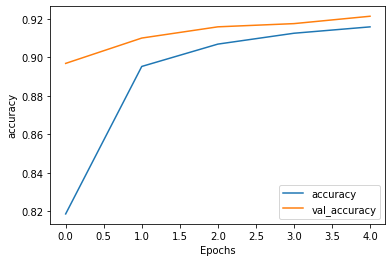

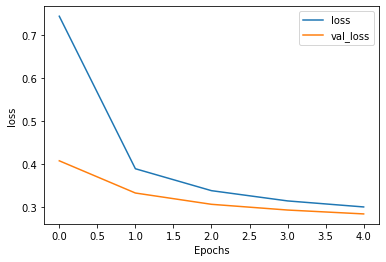

In [7]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
